In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import scanpy as sc
import ast
import anndata
import seaborn as sns
import gc
import pickle
import matplotlib.font_manager as fm

# Load HS-MM orthlog table

In [2]:
data_path = '/mnt/Y/Lab/Stereo_seq_data/RL_BG_data/analysis_results/HOM_MouseHumanSequence.rpt'

# load MGI hom table
hom_df = pd.read_csv(data_path, sep='\t', header=None)

# add columns
hom_df.columns = ['DB Class Key', 'Common Organism Name', 'NCBI Taxon ID', 'Symbol',
                  'EntrezGene ID', 'Mouse MGI ID', 'HGNC ID', 'OMIM Gene ID', 'Genetic Location',
                  'Genome Coordinates (GRCm39, GRCh38)', 'Nucleotide RefSeq IDs',
                  'Protein RefSeq IDs', 'SWISS_PROT IDs']
hom_df

,DB Class Key,Common Organism Name,NCBI Taxon ID,Symbol,EntrezGene ID,Mouse MGI ID,HGNC ID,OMIM Gene ID,Genetic Location,"Genome Coordinates (GRCm39, GRCh38)",Nucleotide RefSeq IDs,Protein RefSeq IDs,SWISS_PROT IDs
0,DB Class Key,Common Organism Name,NCBI Taxon ID,Symbol,EntrezGene ID,Mouse MGI ID,HGNC ID,OMIM Gene ID,Genetic Location,Genome Coordinates (mouse: GRCm39 human: GRCh38),Nucleotide RefSeq IDs,Protein RefSeq IDs,SWISS_PROT IDs
1,49391136,"mouse, laboratory",10090,Aldh1l1,107747,MGI:1340024,NaN,NaN,Chr6 40.16 cM,Chr6:90527751-90576153(+),"NM_001356412,NM_027406,XM_030255052","NP_001343341,XP_030110912,NP_081682",Q8R0Y6
2,49391136,human,9606,ALDH1L1,10840,NaN,HGNC:3978,OMIM:600249,Chr3 q21.3,Chr3:126103562-126197994(-),"NM_001270365,NM_001270364,NM_012190,NM_144776","NP_036322,NP_001257293,XP_011510657,XP_0168611...",O75891
3,49391137,"mouse, laboratory",10090,Sox12,20667,MGI:98360,NaN,NaN,Chr2 74.94 cM,Chr2:152235531-152239966(-),NM_011438,NP_035568,Q04890
4,49391137,human,9606,SOX12,6666,NaN,HGNC:11198,OMIM:601947,Chr20 p13,Chr20:325552-330224(+),NM_006943,NP_008874,O15370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,49413061,"mouse, laboratory",10090,Zfp781a,211135,MGI:2444324,NaN,NaN,Chr8 33.88 cM,Chr8:69723732-69766859(+),"NM_172491,NM_001384124","NP_001371053,NP_766079",NaN
46519,49413062,"mouse, laboratory",10090,9030624G23Rik,66808,MGI:1914058,NaN,NaN,Chr12 8.46 cM,Chr12:24093529-24147257(-),"XM_036157580,NM_001256489,NM_001382819","NP_001243418,XP_036013473,NP_001369748",NaN
46520,49413063,"mouse, laboratory",10090,Gm10033,378466,MGI:3642803,NaN,NaN,Chr8 syntenic,Chr8:69821180-69848196(-),"NM_001374600,NM_001374599","NP_001361528,NP_001361529",NaN
46521,49413064,"mouse, laboratory",10090,3300002I08Rik,69277,MGI:1916527,NaN,NaN,Chr2 74.29 cM,Chr2:150152855-150204685(-),"XM_030252044,XM_011239765,XM_011239764,XM_0112...","XP_030107905,XP_036018428,NP_081293,XP_0065001...",NaN


In [3]:
mouse_df = hom_df[hom_df["Common Organism Name"] == "mouse, laboratory"][["DB Class Key", "Symbol"]]
human_df = hom_df[hom_df["Common Organism Name"] == "human"][["DB Class Key", "Symbol"]]

In [4]:
mouse_df

,DB Class Key,Symbol
1,49391136,Aldh1l1
3,49391137,Sox12
5,49391138,Sry
7,49391139,Fry
9,49391140,Rpe65
...,...,...
46518,49413061,Zfp781a
46519,49413062,9030624G23Rik
46520,49413063,Gm10033
46521,49413064,3300002I08Rik


In [5]:
human_df

,DB Class Key,Symbol
2,49391136,ALDH1L1
4,49391137,SOX12
6,49391138,SRY
8,49391139,FRY
10,49391140,RPE65
...,...,...
45334,49411881,ZSWIM1
45336,49411882,ZSWIM3
45338,49411883,ZSWIM4
45340,49411884,ZSWIM9


In [6]:
merge_hom_df = pd.merge(mouse_df, human_df, on="DB Class Key", suffixes=("_mouse", "_human"))
print(len(merge_hom_df))
merge_hom_df

24589


,DB Class Key,Symbol_mouse,Symbol_human
0,49391136,Aldh1l1,ALDH1L1
1,49391137,Sox12,SOX12
2,49391138,Sry,SRY
3,49391139,Fry,FRY
4,49391140,Rpe65,RPE65
...,...,...,...
24584,49411881,Zswim1,ZSWIM1
24585,49411882,Zswim3,ZSWIM3
24586,49411883,Zswim4,ZSWIM4
24587,49411884,Zswim9,ZSWIM9


In [7]:
# multi mouse-human gene mappings, only keep the first one
merge_hom_df = merge_hom_df.drop_duplicates(subset='Symbol_mouse', keep='first').copy()
print(len(merge_hom_df))
merge_hom_df

20181


,DB Class Key,Symbol_mouse,Symbol_human
0,49391136,Aldh1l1,ALDH1L1
1,49391137,Sox12,SOX12
2,49391138,Sry,SRY
3,49391139,Fry,FRY
4,49391140,Rpe65,RPE65
...,...,...,...
24584,49411881,Zswim1,ZSWIM1
24585,49411882,Zswim3,ZSWIM3
24586,49411883,Zswim4,ZSWIM4
24587,49411884,Zswim9,ZSWIM9


In [8]:
# multi human-mouse gene mappings, only keep the first one
merge_hom_df = merge_hom_df.drop_duplicates(subset='Symbol_human', keep='first').copy()
print(len(merge_hom_df))
merge_hom_df

18203


,DB Class Key,Symbol_mouse,Symbol_human
0,49391136,Aldh1l1,ALDH1L1
1,49391137,Sox12,SOX12
2,49391138,Sry,SRY
3,49391139,Fry,FRY
4,49391140,Rpe65,RPE65
...,...,...,...
24584,49411881,Zswim1,ZSWIM1
24585,49411882,Zswim3,ZSWIM3
24586,49411883,Zswim4,ZSWIM4
24587,49411884,Zswim9,ZSWIM9


# Load HMBA-BG marker genes

In [9]:
data_path = '/mnt/X/Lab/Bereket_public/Human_basal_ganglion_project/Human_Basal_ganglia_Gene_Probe_design/HumanGenomeTranscriptome/BG_gene_list_from_Allen/HMBA_Human_BG_annotation_allen.csv'
cluster_df = pd.read_csv(data_path, index_col='cluster')
cluster_df

,Neighborhood,Class,Subclass,Group,cluster_size,NSF_marker_count,NSForest_markers,binary_genes,donor_composition,donor_composition_alert_0.90,...,cluster_median_level1.class_scANVI_AIT11.6_round1_entropy,cluster_median_level2.neighborhood_scANVI_AIT11.6_round1_entropy,cluster_median_level1.class_scANVI_AIT11.6_round2_entropy,cluster_median_level2.neighborhood_scANVI_AIT11.6_round2_entropy,cluster_median_level3.subclass_scANVI_AIT11.6_round2_entropy,cluster_median_doublet_score,cluster_median_pct_counts_mt,gene_counts,umi_counts,umi_gene_ratio
cluster,,,,,,,,,,,,,,,,,,,,,
IN_1,Subpallium GABA,CN MGE GABA,SN STH GABA,SN STH GABA,95,4.0,"['SST', 'RMST', 'GRIK1', 'TCF7L2']","['SST', 'RMST', 'AC108169.1', 'GRIK1', 'HMGCS1...",H20.30.002(0.9474)| H23.30.001(0.0316)| H20.30...,Cautious,...,0,0.64,0.0,0.5,0.5,0.0267,0.4436,3298,6619,2.01
IN_2,Glut Sero Dopa,F M Glut,BG Glut,SN STH VTA Glut,167,2.0,"['SHOX2', 'LHX9']","['SHOX2', 'SHOX', 'LHX9', 'AC016766.1', 'LHX2'...",H20.30.002(0.9521)| H19.30.004(0.0299)| H23.30...,Cautious,...,0,0,0.0,0,0,0.16,0.4314,9155,50906,5.56
IN_3,Glut Sero Dopa,F M Glut,BG Glut,SN STH VTA Glut,112,2.0,"['LINC02347', 'SIM1']","['DAPL1', 'LINC02196', 'LINC02347', 'SIM1', 'C...",H23.30.001(0.625)| H20.30.002(0.3036)| H19.30....,Balanced,...,0,0,0.0,0,0,0.09,0.2447,6828.5,25948,3.8
IN_4,Glut Sero Dopa,F M Glut,BG Glut,SN STH VTA Glut,130,3.0,"['AL158154.3', 'AL356488.2', 'SLC26A3']","['AL158154.3', 'AL356488.2', 'C5orf63', 'SLC26...",H23.30.001(0.9308)| H20.30.002(0.0462)| H19.30...,Cautious,...,0,0,0.0,0.12,0.12,0.084,0.6749,4958,12160.5,2.45
IN_6,Subpallium GABA,CN MGE GABA,STR Cholinergic GABA,STR Cholinergic GABA,97,2.0,"['HDC', 'PPP1R1C']","['HDC', 'MIR3663HG', 'SLC18A2', 'QRFPR', 'RSPO...",H23.30.001(0.8969)| H19.30.004(0.1031)| H18.30...,Balanced,...,0,0,0.0,0,0,0.16,0.0732,6919,25134,3.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NN_80,Nonneuron,Astro-Epen,Astrocyte,STR Astrocyte,340,6.0,"['OSGIN2', 'AL137139.2', 'ETNPPL', 'SLC14A1', ...","['OSGIN2', 'AL137139.2', 'ETNPPL', 'SLC14A1', ...",H20.30.001(0.3118)| H23.30.001(0.2971)| H18.30...,Balanced,...,0,0,0.0,0,0,0,0.063,2989.5,7326,2.45
NN_81,Nonneuron,Astro-Epen,Astrocyte,STR Astrocyte,1648,2.0,"['CLCF1', 'IL1R1']","['CLCF1', 'CHI3L1', 'EMP1', 'SDS', 'IL1R1', 'L...",H20.30.001(0.9654)| H23.30.001(0.0194)| H20.30...,Cautious,...,0,0,0.0,0,0,0.02,0.0711,3043.5,9077.5,2.98
NN_82,Nonneuron,Astro-Epen,Astrocyte,BN Astrocyte,644,3.0,"['EGLN3', 'AC114971.1', 'PLSCR4']","['RANBP3L', 'COLEC12', 'EGLN3', 'AC114971.1', ...",H20.30.001(0.455)| H23.30.001(0.278)| H20.30.0...,Balanced,...,0,0,0.0,0,0,0.02,0.0297,3008,7976,2.65


In [10]:
# convert str column NSForest_markers, binary_genes to list format
def safe_literal_eval(x):
    if pd.isna(x):
        return np.nan
    return ast.literal_eval(x)

cluster_df['NSForest_markers_list'] = cluster_df['NSForest_markers'].apply(safe_literal_eval)
cluster_df['binary_genes_list'] = cluster_df['binary_genes'].apply(safe_literal_eval)
cluster_df

,Neighborhood,Class,Subclass,Group,cluster_size,NSF_marker_count,NSForest_markers,binary_genes,donor_composition,donor_composition_alert_0.90,...,cluster_median_level1.class_scANVI_AIT11.6_round2_entropy,cluster_median_level2.neighborhood_scANVI_AIT11.6_round2_entropy,cluster_median_level3.subclass_scANVI_AIT11.6_round2_entropy,cluster_median_doublet_score,cluster_median_pct_counts_mt,gene_counts,umi_counts,umi_gene_ratio,NSForest_markers_list,binary_genes_list
cluster,,,,,,,,,,,,,,,,,,,,,
IN_1,Subpallium GABA,CN MGE GABA,SN STH GABA,SN STH GABA,95,4.0,"['SST', 'RMST', 'GRIK1', 'TCF7L2']","['SST', 'RMST', 'AC108169.1', 'GRIK1', 'HMGCS1...",H20.30.002(0.9474)| H23.30.001(0.0316)| H20.30...,Cautious,...,0.0,0.5,0.5,0.0267,0.4436,3298,6619,2.01,"[SST, RMST, GRIK1, TCF7L2]","[SST, RMST, AC108169.1, GRIK1, HMGCS1, TCF7L2,..."
IN_2,Glut Sero Dopa,F M Glut,BG Glut,SN STH VTA Glut,167,2.0,"['SHOX2', 'LHX9']","['SHOX2', 'SHOX', 'LHX9', 'AC016766.1', 'LHX2'...",H20.30.002(0.9521)| H19.30.004(0.0299)| H23.30...,Cautious,...,0.0,0,0,0.16,0.4314,9155,50906,5.56,"[SHOX2, LHX9]","[SHOX2, SHOX, LHX9, AC016766.1, LHX2, ADCYAP1,..."
IN_3,Glut Sero Dopa,F M Glut,BG Glut,SN STH VTA Glut,112,2.0,"['LINC02347', 'SIM1']","['DAPL1', 'LINC02196', 'LINC02347', 'SIM1', 'C...",H23.30.001(0.625)| H20.30.002(0.3036)| H19.30....,Balanced,...,0.0,0,0,0.09,0.2447,6828.5,25948,3.8,"[LINC02347, SIM1]","[DAPL1, LINC02196, LINC02347, SIM1, CPNE9, ADC..."
IN_4,Glut Sero Dopa,F M Glut,BG Glut,SN STH VTA Glut,130,3.0,"['AL158154.3', 'AL356488.2', 'SLC26A3']","['AL158154.3', 'AL356488.2', 'C5orf63', 'SLC26...",H23.30.001(0.9308)| H20.30.002(0.0462)| H19.30...,Cautious,...,0.0,0.12,0.12,0.084,0.6749,4958,12160.5,2.45,"[AL158154.3, AL356488.2, SLC26A3]","[AL158154.3, AL356488.2, C5orf63, SLC26A3, LIN..."
IN_6,Subpallium GABA,CN MGE GABA,STR Cholinergic GABA,STR Cholinergic GABA,97,2.0,"['HDC', 'PPP1R1C']","['HDC', 'MIR3663HG', 'SLC18A2', 'QRFPR', 'RSPO...",H23.30.001(0.8969)| H19.30.004(0.1031)| H18.30...,Balanced,...,0.0,0,0,0.16,0.0732,6919,25134,3.63,"[HDC, PPP1R1C]","[HDC, MIR3663HG, SLC18A2, QRFPR, RSPO2, PPP1R1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NN_80,Nonneuron,Astro-Epen,Astrocyte,STR Astrocyte,340,6.0,"['OSGIN2', 'AL137139.2', 'ETNPPL', 'SLC14A1', ...","['OSGIN2', 'AL137139.2', 'ETNPPL', 'SLC14A1', ...",H20.30.001(0.3118)| H23.30.001(0.2971)| H18.30...,Balanced,...,0.0,0,0,0,0.063,2989.5,7326,2.45,"[OSGIN2, AL137139.2, ETNPPL, SLC14A1, ALDH1A1,...","[OSGIN2, AL137139.2, ETNPPL, SLC14A1, ALDH1A1,..."
NN_81,Nonneuron,Astro-Epen,Astrocyte,STR Astrocyte,1648,2.0,"['CLCF1', 'IL1R1']","['CLCF1', 'CHI3L1', 'EMP1', 'SDS', 'IL1R1', 'L...",H20.30.001(0.9654)| H23.30.001(0.0194)| H20.30...,Cautious,...,0.0,0,0,0.02,0.0711,3043.5,9077.5,2.98,"[CLCF1, IL1R1]","[CLCF1, CHI3L1, EMP1, SDS, IL1R1, LDLR, OAF, F..."
NN_82,Nonneuron,Astro-Epen,Astrocyte,BN Astrocyte,644,3.0,"['EGLN3', 'AC114971.1', 'PLSCR4']","['RANBP3L', 'COLEC12', 'EGLN3', 'AC114971.1', ...",H20.30.001(0.455)| H23.30.001(0.278)| H20.30.0...,Balanced,...,0.0,0,0,0.02,0.0297,3008,7976,2.65,"[EGLN3, AC114971.1, PLSCR4]","[RANBP3L, COLEC12, EGLN3, AC114971.1, PLSCR4, ..."


In [11]:
subset_cluster_df = cluster_df[['Group', 'binary_genes_list']].copy()
group_df = subset_cluster_df.groupby('Group').sum()
print(len(group_df))
group_df.head()

51


,binary_genes_list
Group,
BAM,"[CCDC26, LINC01684, MS4A4E, SIGLEC1, MRC1, CD1..."
BG SKOR1 Glut,"[KCNJ5, AC117453.1, EMX2OS, RSPO3, TBR1, AC022..."
BN Astrocyte,"[STK32A, LINC01088, EDNRB, TNC, APOE, SLC6A11,..."
BN LAMP5 CXCL14 GABA,"[ROR2, CRH, AC132803.1, EYA4, KIT, NRIP3, EPHA..."
BN LAMP5 LHX6 GABA,"[LINC01344, ADGRG6, AL136456.1, CA3, EYA4, ITG..."


In [12]:
hmba_markers = []
for i in range(len(group_df)):
    hmba_markers += group_df['binary_genes_list'].iloc[i]
print(len(hmba_markers))
# remove duplicated genes
hmba_markers = list(set(hmba_markers))
print(len(hmba_markers))
hmba_markers

2950
1192


['IL17RD',
 'GALNT3',
 'LINC00893',
 'TPH2',
 'NTS',
 'AC117453.1',
 'LINC02055',
 'CHRNA7',
 'AC114316.1',
 'CST3',
 'AC090993.1',
 'CORT',
 'AC096576.3',
 'RXFP2',
 'SCIN',
 'CD163L1',
 'PDGFRB',
 'AC008786.1',
 'ADAMTS9',
 'AL033523.1',
 'SVIL',
 'PTPRC',
 'LINC01608',
 'C1QL1',
 'ARHGEF28',
 'NRP1',
 'AC069133.1',
 'SATB1',
 'AEBP1',
 'COBLL1',
 'LINC00348',
 'CD53',
 'GLRA3',
 'MYL9',
 'AC119868.2',
 'NR2F2-AS1',
 'LINC01060',
 'AC019330.1',
 'GLYATL2',
 'SLC24A4',
 'AC117461.1',
 'LINC02196',
 'AC067956.1',
 'AC060765.1',
 'AGBL1',
 'ADAMTS9-AS2',
 'COL21A1',
 'LINC01094',
 'CDH23',
 'COL6A1',
 'LINC02112',
 'ERG',
 'ZNF804B',
 'LINC01118',
 'ANO2',
 'NPAS1',
 'AC096719.1',
 'GFRA1',
 'LINC02359',
 'FAM198B-AS1',
 'NPFFR2',
 'GFRA2',
 'LMNTD1',
 'MECOM',
 'AC004160.1',
 'SEMA3D',
 'ENPP6',
 'LINC01435',
 'TBXAS1',
 'AL136962.1',
 'SIRT2',
 'ANGPTL4',
 'LINC02223',
 'OPRD1',
 'VIT',
 'RASGEF1C',
 'BCAN',
 'PTN',
 'AP000787.1',
 'DDO',
 'DCHS2',
 'C5orf64',
 'LINC01735',
 'VWC2',
 

In [13]:
merge_hom_df

,DB Class Key,Symbol_mouse,Symbol_human
0,49391136,Aldh1l1,ALDH1L1
1,49391137,Sox12,SOX12
2,49391138,Sry,SRY
3,49391139,Fry,FRY
4,49391140,Rpe65,RPE65
...,...,...,...
24584,49411881,Zswim1,ZSWIM1
24585,49411882,Zswim3,ZSWIM3
24586,49411883,Zswim4,ZSWIM4
24587,49411884,Zswim9,ZSWIM9


In [14]:
mouse_markers, human_markers = [], []
for g in hmba_markers:
    df = merge_hom_df[merge_hom_df['Symbol_human'] == g]
    if len(df) > 0:
        assert len(df) == 1
        mouse_gene, human_gene = df['Symbol_mouse'].item(), df['Symbol_human'].item()
        mouse_markers.append(mouse_gene)
        human_markers.append(human_gene)
print(len(mouse_markers))
print(len(human_markers))
print('----------')
print('----------')
print('----------')
print(mouse_markers)
print('----------')
print('----------')
print('----------')
print(human_markers)

805
805
----------
----------
----------
['Il17rd', 'Galnt3', 'Tph2', 'Nts', 'Cst3', 'Cort', 'Rxfp2', 'Scin', 'Pdgfrb', 'Adamts9', 'Svil', 'Ptprc', 'C1ql1', 'Arhgef28', 'Nrp1', 'Satb1', 'Aebp1', 'Cobll1', 'Cd53', 'Glra3', 'Myl9', 'Slc24a4', 'Agbl1', '9530026P05Rik', 'Cdh23', 'Col6a1', 'Erg', 'Zfp804b', 'Ano2', 'Npas1', 'Gfra1', 'Npffr2', 'Gfra2', 'Lmntd1', 'Mecom', 'Sema3d', 'Enpp6', 'Tbxas1', 'Sirt2', 'Angptl4', 'Oprd1', 'Vit', 'Rasgef1c', 'Bcan', 'Ptn', 'Ddo', 'Dchs2', 'Vwc2', 'Snx7', 'Dcdc2c', 'Slco2a1', 'Coro6', 'Itga8', 'Unc13c', 'Oaf', 'Epb41l4a', 'Nnat', 'C7', 'Lrfn2', 'Cfap58', 'Mkx', 'Slc7a5', 'Gpc4', 'Hspa1a', 'Lhx9', 'Cnn3', 'Slc26a3', 'Car8', 'Igfbp2', 'Adm', 'Dipk2a', 'Pdgfra', 'Htr7', 'Acvr1c', 'Fbn2', 'Frmpd3', 'Arhgap18', 'Galnt15', 'Tafa1', 'Ngf', 'Emp1', 'Kcnk2', 'Slc19a1', 'Chrdl1', 'Slc5a8', 'Blm', 'Scube1', 'Plpp4', 'Dnah8', 'Nr2e1', 'Hspa1b', 'Angpt1', 'Lef1', 'Mrap2', 'Fgfr2', 'Pkp2', 'Cdk18', 'Plekhg1', 'Grin3a', 'Adora2a', 'Kmo', 'Ism1', 'Vwa5b1', 'Hpgd', 'Epas

# Load WMB scRNA-seq BG data

In [15]:
save_dir = '/mnt/Y/Lab/Stereo_seq_data/RL_BG_data/analysis_results'
with open(join(save_dir, 'WMB_BG_10xv3_scRNA_seq_20251005.pkl'), 'rb') as f:
    wmb_bg_adata = pickle.load(f)

In [16]:
# log2 data
wmb_bg_adata.X[10:1000, 10:100].data

array([6.2518306, 6.4715157, 7.824116 , ..., 5.818294 , 8.603565 ,
       7.38611  ], dtype=float32)

In [17]:
wmb_bg_adata.obs

,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,...,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,region_of_interest_order,region_of_interest_color
cell_label,,,,,,,,,,,,,,,,,,,,,
CACACAAGTTAGGAGC-124_D01,CACACAAGTTAGGAGC,124_D01,L8TX_190531_01_C02,WMB-10Xv3-STR,cell,NaN,10Xv3,sAMY,Snap25-IRES2-Cre;Ai14-462434,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,079 CEA-BST Six3 Cyp26b1 Gaba,0367 CEA-BST Six3 Cyp26b1 Gaba_1,1327 CEA-BST Six3 Cyp26b1 Gaba_1,#FF3358,#450099,#73C1FF,#660F30,#FFED73,21,#300099
ACAAAGATCTTGATTC-118_B01,ACAAAGATCTTGATTC,118_B01,L8TX_190509_01_D09,WMB-10Xv3-STR,cell,NaN,10Xv3,sAMY,Snap25-IRES2-Cre;Ai14-459490,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,079 CEA-BST Six3 Cyp26b1 Gaba,0367 CEA-BST Six3 Cyp26b1 Gaba_1,1327 CEA-BST Six3 Cyp26b1 Gaba_1,#FF3358,#450099,#73C1FF,#660F30,#FFED73,21,#300099
ACTATGGAGCGTGCTC-326_B05,ACTATGGAGCGTGCTC,326_B05,L8TX_200813_01_F10,WMB-10Xv3-STR,cell,NaN,10Xv3,sAMY,Snap25-IRES2-Cre;Ai14-536274,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,079 CEA-BST Six3 Cyp26b1 Gaba,0367 CEA-BST Six3 Cyp26b1 Gaba_1,1327 CEA-BST Six3 Cyp26b1 Gaba_1,#FF3358,#450099,#73C1FF,#660F30,#FFED73,21,#300099
TGTTTGTAGACATACA-124_A01,TGTTTGTAGACATACA,124_A01,L8TX_190531_01_H01,WMB-10Xv3-STR,cell,NaN,10Xv3,sAMY,Snap25-IRES2-Cre;Ai14-462434,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,079 CEA-BST Six3 Cyp26b1 Gaba,0367 CEA-BST Six3 Cyp26b1 Gaba_1,1327 CEA-BST Six3 Cyp26b1 Gaba_1,#FF3358,#450099,#73C1FF,#660F30,#FFED73,21,#300099
AAAGAACTCTGTGCTC-335_B04,AAAGAACTCTGTGCTC,335_B04,L8TX_200820_01_H01,WMB-10Xv3-STR,cell,NaN,10Xv3,sAMY,Snap25-IRES2-Cre;Ai14-538745,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,079 CEA-BST Six3 Cyp26b1 Gaba,0367 CEA-BST Six3 Cyp26b1 Gaba_1,1327 CEA-BST Six3 Cyp26b1 Gaba_1,#FF3358,#450099,#73C1FF,#660F30,#FFED73,21,#300099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCGATGCG-368_A05,TTTGGTTTCCGATGCG,368_A05,L8TX_200924_01_D06,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-544398,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,334 Microglia NN,1194 Microglia NN_1,5312 Microglia NN_1,#666666,#825f45,#CC1F4E,#62CC3D,#651FCC,22,#B973FF
TTTGTTGCATGGAGAC-415_A01,TTTGTTGCATGGAGAC,415_A01,L8TX_201106_01_D03,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-550848,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473,22,#B973FF
TTTGTTGGTGACCGTC-417_C03,TTTGTTGGTGACCGTC,417_C03,L8TX_201106_01_B03,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-551630,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473,22,#B973FF


In [18]:
print(len(wmb_bg_adata.obs['supertype'].unique()))
np.sort(wmb_bg_adata.obs['supertype'].unique())

163


array(['0055 MEA Slc17a7 Glut_1', '0056 MEA Slc17a7 Glut_2',
       '0057 MEA Slc17a7 Glut_3', '0166 OB-STR-CTX Inh IMN_1',
       '0169 OB-STR-CTX Inh IMN_4', '0199 Lamp5 Gaba_1',
       '0234 STR Prox1 Lhx6 Gaba_2', '0236 STR Lhx8 Gaba_1',
       '0237 STR Lhx8 Gaba_2', '0238 Sst Chodl Gaba_1',
       '0239 Sst Chodl Gaba_2', '0240 Sst Chodl Gaba_3',
       '0244 NDB-SI-MA-STRv Lhx8 Gaba_1',
       '0245 NDB-SI-MA-STRv Lhx8 Gaba_2',
       '0246 NDB-SI-MA-STRv Lhx8 Gaba_3',
       '0247 NDB-SI-MA-STRv Lhx8 Gaba_4',
       '0248 NDB-SI-MA-STRv Lhx8 Gaba_5',
       '0249 NDB-SI-MA-STRv Lhx8 Gaba_6',
       '0250 NDB-SI-MA-STRv Lhx8 Gaba_7',
       '0251 NDB-SI-MA-STRv Lhx8 Gaba_8',
       '0253 NDB-SI-MA-STRv Lhx8 Gaba_10',
       '0254 NDB-SI-MA-STRv Lhx8 Gaba_11',
       '0257 GPe-SI Sox6 Cyp26b1 Gaba_1',
       '0258 GPe-SI Sox6 Cyp26b1 Gaba_2', '0259 PAL-STR Gaba-Chol_1',
       '0260 PAL-STR Gaba-Chol_2', '0261 PAL-STR Gaba-Chol_3',
       '0262 OT D3 Folh1 Gaba_1', '0263 OT D3 Fo

# Load HMBA-BG data

In [19]:
data_path = '/mnt/X/Lab/Bereket_public/Human_basal_ganglion_project/Stero_seq_data_analysis/bioinformatic_analysis/HumanBG_scRNA_seq_Allen/Human_HMBA_basalganglia_AIT_pre-print.h5ad'
hmba_bg_adata = sc.read_h5ad(data_path)
hmba_bg_adata

AnnData object with n_obs × n_vars = 1034819 × 36601
    obs: 'Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster', 'cluster_id', 'cell_type_ontology_term', 'load_id', 'donor_id', 'assay', 'assay_ontology_term_id', 'organism', 'organism_ontology_term_id', 'development_stage', 'anatomical_region', 'anatomical_region_merged', 'anatomical_region_ontology_term_id', 'brain_region_ontology_term_id', 'self_reported_sex', 'self_reported_sex_ontology_term_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'disease', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'atac_confidently_mapped_read_pairs', 'atac_fraction_of_genome_in_peaks', 'atac_fraction_of_high_quality_fragments_in_cells', 'atac_fraction_of_high_quality_fragments_overlapping_tss', 'atac_fraction_of_high_quality_fragments_overlapping_peaks', 'atac_fraction_of_transposition_events_in_peaks_in_cells', 'atac_mean_raw_read_pairs_per_cell', 'atac_median_high_quality_fragments_per_cell', 'ata

In [20]:
del hmba_bg_adata.obsm
del hmba_bg_adata.obsp
del hmba_bg_adata.uns
gc.collect()
hmba_bg_adata

AnnData object with n_obs × n_vars = 1034819 × 36601
    obs: 'Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster', 'cluster_id', 'cell_type_ontology_term', 'load_id', 'donor_id', 'assay', 'assay_ontology_term_id', 'organism', 'organism_ontology_term_id', 'development_stage', 'anatomical_region', 'anatomical_region_merged', 'anatomical_region_ontology_term_id', 'brain_region_ontology_term_id', 'self_reported_sex', 'self_reported_sex_ontology_term_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'disease', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'atac_confidently_mapped_read_pairs', 'atac_fraction_of_genome_in_peaks', 'atac_fraction_of_high_quality_fragments_in_cells', 'atac_fraction_of_high_quality_fragments_overlapping_tss', 'atac_fraction_of_high_quality_fragments_overlapping_peaks', 'atac_fraction_of_transposition_events_in_peaks_in_cells', 'atac_mean_raw_read_pairs_per_cell', 'atac_median_high_quality_fragments_per_cell', 'ata

In [21]:
# log2 data
hmba_bg_adata.X[10:1000, 10:100].data

array([6.3837314, 5.9791102, 3.916266 , ..., 5.407593 , 4.498003 ,
       4.498003 ], dtype=float32)

In [22]:
hmba_bg_adata.obs

,Neighborhood,Class,Subclass,Group,Cluster,cluster_id,cell_type_ontology_term,load_id,donor_id,assay,...,color_class,accession_neighborhood,CL:ID_neighborhood,tokens_neighborhood,display_order_neighborhood,color_hex_neighborhood,color_neighborhood,cell_barcode,barcoded_cell_sample_label,alignment_job_database
AAACAGCCAAATGCCC-2362_A05,Nonneuron,Vascular,VLMC,VLMC,Human-451,Human-451,CL:0000003,2362_A05,H24.30.001,10x multiome,...,NaN,CS20250428_NEIGH_0001,CL:0000000,Nonneuron,1,#f2ca7d,NaN,AAACAGCCAAATGCCC,2362_A05,AIBS
AAACAGCCAATTGAGA-2362_A05,Nonneuron,OPC-Oligo,Oligodendrocyte,Oligo OPALIN,Human-1,Human-1,CL:0000003,2362_A05,H24.30.001,10x multiome,...,NaN,CS20250428_NEIGH_0001,CL:0000000,Nonneuron,1,#f2ca7d,NaN,AAACAGCCAATTGAGA,2362_A05,AIBS
AAACAGCCAGCATGTC-2362_A05,Nonneuron,Immune,Microglia,Microglia,Human-153,Human-153,CL:0000003,2362_A05,H24.30.001,10x multiome,...,NaN,CS20250428_NEIGH_0001,CL:0000000,Nonneuron,1,#f2ca7d,NaN,AAACAGCCAGCATGTC,2362_A05,AIBS
AAACAGCCATTGACAT-2362_A05,Nonneuron,OPC-Oligo,Oligodendrocyte,Oligo OPALIN,Human-1,Human-1,CL:0000003,2362_A05,H24.30.001,10x multiome,...,NaN,CS20250428_NEIGH_0001,CL:0000000,Nonneuron,1,#f2ca7d,NaN,AAACAGCCATTGACAT,2362_A05,AIBS
AAACAGCCATTGTGGC-2362_A05,Nonneuron,Astro-Epen,Astrocyte,Astrocyte,Human-14,Human-14,CL:0000003,2362_A05,H24.30.001,10x multiome,...,NaN,CS20250428_NEIGH_0001,CL:0000000,Nonneuron,1,#f2ca7d,NaN,AAACAGCCATTGTGGC,2362_A05,AIBS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCCGCAAAT-2016_B03,Nonneuron,OPC-Oligo,Oligodendrocyte,Oligo OPALIN,Human-1,Human-1,CL:0000003,2016_B03,H23.30.001,10x multiome,...,NaN,CS20250428_NEIGH_0001,CL:0000000,Nonneuron,1,#f2ca7d,NaN,TTTGTGTTCCGCAAAT,2016_B03,AIBS
TTTGTGTTCCTCCCTC-2016_B03,Nonneuron,Immune,Microglia,Microglia,Human-153,Human-153,CL:0000003,2016_B03,H23.30.001,10x multiome,...,NaN,CS20250428_NEIGH_0001,CL:0000000,Nonneuron,1,#f2ca7d,NaN,TTTGTGTTCCTCCCTC,2016_B03,AIBS
TTTGTGTTCTGGCATG-2016_B03,Subpallium GABA,CN LGE GABA,STR D1 MSN,STRd D1 Striosome MSN,Human-86,Human-86,CL:0000003,2016_B03,H23.30.001,10x multiome,...,NaN,CS20250428_NEIGH_0002,NaN,Subpallium|GABA,3,#19613b,NaN,TTTGTGTTCTGGCATG,2016_B03,AIBS
TTTGTGTTCTTGTCCA-2016_B03,Subpallium GABA,CN LGE GABA,STR D2 MSN,STRd D2 Matrix MSN,Human-384,Human-384,CL:0000003,2016_B03,H23.30.001,10x multiome,...,NaN,CS20250428_NEIGH_0002,NaN,Subpallium|GABA,3,#19613b,NaN,TTTGTGTTCTTGTCCA,2016_B03,AIBS


In [23]:
print(len(hmba_bg_adata.obs['Group'].unique()))
np.sort(hmba_bg_adata.obs['Group'].unique())

60


array(['AMY-SLEA-BNST D1 GABA', 'AMY-SLEA-BNST GABA', 'Astrocyte',
       'B cells', 'BAM', 'BF SKOR1 Glut', 'COP', 'Endo', 'Ependymal',
       'GPe MEIS2-SOX6 GABA', 'GPe SOX6-CTXND1 GABA',
       'GPe-NDB-SI LHX6-LHX8-GBX1 GABA', 'GPi Core', 'GPi Shell',
       'GPin-BF Cholinergic GABA', 'ImAstro', 'ImOligo',
       'LAMP5-CXCL14 GABA', 'LAMP5-LHX6 GABA', 'Microglia', 'Monocyte',
       'OB Dopa-GABA', 'OB FRMD7 GABA', 'OPC', 'OT D1 ICj',
       'Oligo OPALIN', 'Oligo PLEKHG1', 'Pericyte', 'SMC', 'SN EBF2 GABA',
       'SN GATA3-PVALB GABA', 'SN SEMA5A GABA', 'SN SOX6 Dopa',
       'SN-VTR CALB1 Dopa', 'SN-VTR GAD2 Dopa',
       'SN-VTR-HTH GATA3-TCF7L2 GABA', 'STH PVALB-PITX2 Glut',
       'STR Cholinergic GABA', 'STR D1D2 Hybrid MSN',
       'STR FS PTHLH-PVALB GABA', 'STR LYPD6-RSPO2 GABA',
       'STR SST-ADARB2 GABA', 'STR SST-CHODL GABA', 'STR SST-RSPO2 GABA',
       'STR TAC3-PLPP4 GABA', 'STR-BF TAC3-PLPP4-LHX8 GABA',
       'STRd Cholinergic GABA', 'STRd D1 Matrix MSN',
   

# Subset common genes

In [24]:
mouse_markers

['Il17rd',
 'Galnt3',
 'Tph2',
 'Nts',
 'Cst3',
 'Cort',
 'Rxfp2',
 'Scin',
 'Pdgfrb',
 'Adamts9',
 'Svil',
 'Ptprc',
 'C1ql1',
 'Arhgef28',
 'Nrp1',
 'Satb1',
 'Aebp1',
 'Cobll1',
 'Cd53',
 'Glra3',
 'Myl9',
 'Slc24a4',
 'Agbl1',
 '9530026P05Rik',
 'Cdh23',
 'Col6a1',
 'Erg',
 'Zfp804b',
 'Ano2',
 'Npas1',
 'Gfra1',
 'Npffr2',
 'Gfra2',
 'Lmntd1',
 'Mecom',
 'Sema3d',
 'Enpp6',
 'Tbxas1',
 'Sirt2',
 'Angptl4',
 'Oprd1',
 'Vit',
 'Rasgef1c',
 'Bcan',
 'Ptn',
 'Ddo',
 'Dchs2',
 'Vwc2',
 'Snx7',
 'Dcdc2c',
 'Slco2a1',
 'Coro6',
 'Itga8',
 'Unc13c',
 'Oaf',
 'Epb41l4a',
 'Nnat',
 'C7',
 'Lrfn2',
 'Cfap58',
 'Mkx',
 'Slc7a5',
 'Gpc4',
 'Hspa1a',
 'Lhx9',
 'Cnn3',
 'Slc26a3',
 'Car8',
 'Igfbp2',
 'Adm',
 'Dipk2a',
 'Pdgfra',
 'Htr7',
 'Acvr1c',
 'Fbn2',
 'Frmpd3',
 'Arhgap18',
 'Galnt15',
 'Tafa1',
 'Ngf',
 'Emp1',
 'Kcnk2',
 'Slc19a1',
 'Chrdl1',
 'Slc5a8',
 'Blm',
 'Scube1',
 'Plpp4',
 'Dnah8',
 'Nr2e1',
 'Hspa1b',
 'Angpt1',
 'Lef1',
 'Mrap2',
 'Fgfr2',
 'Pkp2',
 'Cdk18',
 'Plekhg1',
 'G

In [25]:
wmb_bg_adata.var

,gene_symbol
gene_identifier,
ENSMUSG00000051951,Xkr4
ENSMUSG00000089699,Gm1992
ENSMUSG00000102331,Gm19938
ENSMUSG00000102343,Gm37381
ENSMUSG00000025900,Rp1
...,...
ENSMUSG00000095523,AC124606.1
ENSMUSG00000095475,AC133095.2
ENSMUSG00000094855,AC133095.1


In [26]:
mouse_markers2, human_markers2 = [], []
for i, g in enumerate(mouse_markers):
    if (wmb_bg_adata.var['gene_symbol'] == g).sum() == 0:
        continue
    mouse_markers2.append(mouse_markers[i])
    human_markers2.append(human_markers[i])
mouse_markers, human_markers = mouse_markers2, human_markers2
print(len(mouse_markers))
print(len(human_markers))

798
798


In [27]:
wmb_bg_adata.var['gene_identifier'] = wmb_bg_adata.var.index
wmb_bg_adata.var

,gene_symbol,gene_identifier
gene_identifier,,
ENSMUSG00000051951,Xkr4,ENSMUSG00000051951
ENSMUSG00000089699,Gm1992,ENSMUSG00000089699
ENSMUSG00000102331,Gm19938,ENSMUSG00000102331
ENSMUSG00000102343,Gm37381,ENSMUSG00000102343
ENSMUSG00000025900,Rp1,ENSMUSG00000025900
...,...,...
ENSMUSG00000095523,AC124606.1,ENSMUSG00000095523
ENSMUSG00000095475,AC133095.2,ENSMUSG00000095475
ENSMUSG00000094855,AC133095.1,ENSMUSG00000094855


In [28]:
wmb_bg_adata.var.index = wmb_bg_adata.var['gene_symbol'].astype(str)
wmb_bg_adata.var_names_make_unique(join='_')
wmb_bg_adata.var

,gene_symbol,gene_identifier
gene_symbol,,
Xkr4,Xkr4,ENSMUSG00000051951
Gm1992,Gm1992,ENSMUSG00000089699
Gm19938,Gm19938,ENSMUSG00000102331
Gm37381,Gm37381,ENSMUSG00000102343
Rp1,Rp1,ENSMUSG00000025900
...,...,...
AC124606.1,AC124606.1,ENSMUSG00000095523
AC133095.2,AC133095.2,ENSMUSG00000095475
AC133095.1,AC133095.1,ENSMUSG00000094855


In [29]:
# filter wmb_bg_adata var
marker_wmb_bg_adata = wmb_bg_adata[:, mouse_markers].copy()
marker_wmb_bg_adata

AnnData object with n_obs × n_vars = 361145 × 798
    obs: 'cell_barcode', 'barcoded_cell_sample_label', 'library_label', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color'
    var: 'gene_symbol', 'gene_identifier'

In [30]:
assert len(marker_wmb_bg_adata.var) == len(mouse_markers)

In [31]:
# release memory
del wmb_bg_adata
gc.collect()

40

In [32]:
# filter hmba_bg_adata var
marker_hmba_bg_adata = hmba_bg_adata[:, human_markers].copy()
marker_hmba_bg_adata

AnnData object with n_obs × n_vars = 1034819 × 798
    obs: 'Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster', 'cluster_id', 'cell_type_ontology_term', 'load_id', 'donor_id', 'assay', 'assay_ontology_term_id', 'organism', 'organism_ontology_term_id', 'development_stage', 'anatomical_region', 'anatomical_region_merged', 'anatomical_region_ontology_term_id', 'brain_region_ontology_term_id', 'self_reported_sex', 'self_reported_sex_ontology_term_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'disease', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'atac_confidently_mapped_read_pairs', 'atac_fraction_of_genome_in_peaks', 'atac_fraction_of_high_quality_fragments_in_cells', 'atac_fraction_of_high_quality_fragments_overlapping_tss', 'atac_fraction_of_high_quality_fragments_overlapping_peaks', 'atac_fraction_of_transposition_events_in_peaks_in_cells', 'atac_mean_raw_read_pairs_per_cell', 'atac_median_high_quality_fragments_per_cell', 'atac_

In [33]:
marker_wmb_bg_adata.var

,gene_symbol,gene_identifier
gene_symbol,,
Il17rd,Il17rd,ENSMUSG00000040717
Galnt3,Galnt3,ENSMUSG00000026994
Tph2,Tph2,ENSMUSG00000006764
Nts,Nts,ENSMUSG00000019890
Cst3,Cst3,ENSMUSG00000027447
...,...,...
Spata22,Spata22,ENSMUSG00000112920
Rasgrp1,Rasgrp1,ENSMUSG00000027347
Mcam,Mcam,ENSMUSG00000032135


In [34]:
marker_hmba_bg_adata.var

,gene_id,gene_name,feature,chromosome,start,stop,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mt,highly_variable,highly_variable_rank,means,variances,variances_norm,highly_variable_nbatches,ensembl_id
IL17RD,ENSG00000144730,IL17RD,Gene Expression,chr3,57142490,57170306,64301,0.055554,0.054066,96.179620,93504,11.445770,False,False,3763.0,0.054113,0.097902,1.270169,1,ENSG00000144730
GALNT3,ENSG00000115339,GALNT3,Gene Expression,chr2,165761906,165794247,122558,0.118483,0.111974,92.718339,199420,12.203173,False,False,3967.0,0.120970,0.324364,1.472411,3,ENSG00000115339
TPH2,ENSG00000139287,TPH2,Gene Expression,chr12,71938844,71938845,23453,0.023676,0.023400,98.606563,39849,10.592878,False,True,2344.0,0.021601,1.091508,2.518343,8,ENSG00000139287
NTS,ENSG00000133636,NTS,Gene Expression,chr12,85874294,85874295,27781,0.055149,0.053682,98.349420,92821,11.438439,False,True,129.0,0.034080,0.457587,7.443869,10,ENSG00000133636
CST3,ENSG00000101439,CST3,Gene Expression,chr20,23637944,23638473,369369,0.656974,0.504993,78.054310,1105757,13.916042,False,True,1074.0,0.710945,5.745649,2.835686,10,ENSG00000101439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPATA22,ENSG00000141255,SPATA22,Gene Expression,chr17,3471738,3513852,163810,0.164924,0.152656,90.267393,277585,12.533886,False,False,2776.0,0.182475,0.461787,1.491728,7,ENSG00000141255
RASGRP1,ENSG00000172575,RASGRP1,Gene Expression,chr15,38564634,38565575,552447,1.370815,0.863234,67.176914,2307225,14.651556,False,False,3179.5,1.584843,9.360287,1.482433,8,ENSG00000172575
MCAM,ENSG00000076706,MCAM,Gene Expression,chr11,119317129,119317130,117753,0.097916,0.093414,93.003823,164803,12.012512,False,False,3958.0,0.097236,0.172719,1.150188,1,ENSG00000076706
SYTL4,ENSG00000102362,SYTL4,Gene Expression,chrX,100731509,100732121,144772,0.216271,0.195790,91.398516,364007,12.804931,False,True,1489.0,0.236201,1.158827,2.161203,9,ENSG00000102362


In [35]:
# release memory
del hmba_bg_adata
gc.collect()

403

# Construct expression matrix

In [37]:
sc.pp.scale(marker_wmb_bg_adata)
marker_wmb_bg_adata

/home/exx/.conda/envs/ren_bg/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


AnnData object with n_obs × n_vars = 361145 × 798
    obs: 'cell_barcode', 'barcoded_cell_sample_label', 'library_label', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color'
    var: 'gene_symbol', 'gene_identifier', 'mean', 'std'

In [38]:
marker_hmba_bg_adata

AnnData object with n_obs × n_vars = 1034819 × 798
    obs: 'Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster', 'cluster_id', 'cell_type_ontology_term', 'load_id', 'donor_id', 'assay', 'assay_ontology_term_id', 'organism', 'organism_ontology_term_id', 'development_stage', 'anatomical_region', 'anatomical_region_merged', 'anatomical_region_ontology_term_id', 'brain_region_ontology_term_id', 'self_reported_sex', 'self_reported_sex_ontology_term_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'disease', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'atac_confidently_mapped_read_pairs', 'atac_fraction_of_genome_in_peaks', 'atac_fraction_of_high_quality_fragments_in_cells', 'atac_fraction_of_high_quality_fragments_overlapping_tss', 'atac_fraction_of_high_quality_fragments_overlapping_peaks', 'atac_fraction_of_transposition_events_in_peaks_in_cells', 'atac_mean_raw_read_pairs_per_cell', 'atac_median_high_quality_fragments_per_cell', 'atac_

In [39]:
sc.pp.scale(marker_hmba_bg_adata)

/home/exx/.conda/envs/ren_bg/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


In [40]:
print(marker_hmba_bg_adata.X[10:1000, 10:100])

[[-0.50163906 -0.33789476 -0.15303903 ... -0.54597184 -0.25847988
  -0.4440842 ]
 [-0.50163906 -0.33789476 -0.15303903 ... -0.54597184 -0.25847988
   2.11107516]
 [-0.50163906 -0.33789476 -0.15303903 ... -0.54597184 -0.25847988
  -0.4440842 ]
 ...
 [-0.50163906 -0.33789476 -0.15303903 ...  1.7401491  -0.25847988
  -0.4440842 ]
 [-0.50163906 -0.33789476 -0.15303903 ... -0.54597184 -0.25847988
  -0.4440842 ]
 [-0.50163906 -0.33789476 -0.15303903 ...  1.5550453  -0.25847988
  -0.4440842 ]]


In [41]:
sc.pp.scale(marker_hmba_bg_adata)
print(marker_hmba_bg_adata.X[10:1000, 10:100])

[[-0.50163906 -0.33789476 -0.15303903 ... -0.54597184 -0.25847988
  -0.4440842 ]
 [-0.50163906 -0.33789476 -0.15303903 ... -0.54597184 -0.25847988
   2.11107516]
 [-0.50163906 -0.33789476 -0.15303903 ... -0.54597184 -0.25847988
  -0.4440842 ]
 ...
 [-0.50163906 -0.33789476 -0.15303903 ...  1.7401491  -0.25847988
  -0.4440842 ]
 [-0.50163906 -0.33789476 -0.15303903 ... -0.54597184 -0.25847988
  -0.4440842 ]
 [-0.50163906 -0.33789476 -0.15303903 ...  1.5550453  -0.25847988
  -0.4440842 ]]


In [42]:
# construct wmb_bg supertype expression mat
wmb_stype_expr = pd.DataFrame(
    0.0,
    index=np.sort(marker_wmb_bg_adata.obs['supertype'].unique()),
    columns=marker_wmb_bg_adata.var['gene_symbol'],
)

for stype in wmb_stype_expr.index:
    # (n_cells, n_genes)
    all_cells_expr = marker_wmb_bg_adata[marker_wmb_bg_adata.obs['supertype'] == stype]
    # (n_genes)
    stype_expr = np.mean(all_cells_expr.X, axis=0)
    # assign back to df
    wmb_stype_expr.loc[stype] = stype_expr

print(wmb_stype_expr.shape)
wmb_stype_expr.iloc[:, :100]

(163, 798)


gene_symbol,Il17rd,Galnt3,Tph2,Nts,Cst3,Cort,Rxfp2,Scin,Pdgfrb,Adamts9,...,Hspa1b,Angpt1,Lef1,Mrap2,Fgfr2,Pkp2,Cdk18,Plekhg1,Grin3a,Adora2a
0055 MEA Slc17a7 Glut_1,0.478865,1.199926,0.065053,-0.292088,-0.517083,-0.013368,-0.012001,-0.024674,-0.277403,2.064193,...,0.818398,1.651537,-0.165279,0.291106,0.090549,1.149211,1.077064,-0.587412,1.242773,-0.392358
0056 MEA Slc17a7 Glut_2,-0.088976,-0.067273,0.113191,-0.190134,-0.459410,-0.037028,-0.052190,0.003835,-0.278878,-0.053186,...,-0.107653,3.467606,-0.208583,0.453916,-0.086678,0.057247,1.114170,-0.568798,0.578209,-0.389537
0057 MEA Slc17a7 Glut_3,0.302054,0.310898,0.100774,-0.311609,-0.445946,-0.056900,-0.076447,0.068351,-0.289998,1.843169,...,1.071925,1.670667,-0.172052,-0.279475,0.009979,0.400176,0.569524,-0.578774,0.601426,-0.387766
0166 OB-STR-CTX Inh IMN_1,0.042989,-0.265141,0.018178,-0.281322,0.324439,0.108863,-0.085566,-0.014122,-0.151353,-0.312702,...,-0.210463,-0.220644,0.635721,-0.404718,-0.078656,-0.262162,-0.534575,0.148697,-0.075170,-0.192675
0169 OB-STR-CTX Inh IMN_4,-0.206537,-0.273637,-0.059560,-0.241878,-0.423102,-0.033717,-0.095291,-0.039785,-0.287424,-0.341222,...,-0.216761,-0.180486,-0.158302,-0.418129,0.338203,-0.418981,-0.525302,-0.508070,-0.662260,-0.200360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188 VLMC NN_2,0.084249,-0.276448,-0.079805,-0.303678,0.725098,-0.090245,-0.080912,0.049128,3.145413,0.459622,...,0.590687,0.302763,0.929405,-0.399981,-0.095474,-0.396039,-0.516947,0.804994,-0.754151,0.608217
1191 Peri NN_1,1.067487,-0.274848,-0.079805,0.384215,0.573902,-0.061847,-0.085926,-0.026653,4.521991,-0.106559,...,0.373838,0.078949,0.920969,-0.406679,-1.111278,-0.403417,-0.510871,-0.283863,-0.749040,1.160256
1192 SMC NN_1,0.351427,-0.271706,-0.067801,-0.247656,0.654398,-0.078236,-0.083653,-0.025389,3.212777,0.056211,...,0.247533,2.447171,-0.007470,-0.399148,-0.779982,-0.386941,-0.493643,-0.558522,-0.774026,0.173180
1193 Endo NN_1,1.537628,-0.269445,-0.073655,-0.268693,0.406918,-0.080041,-0.080264,-0.030142,-0.077620,0.284950,...,0.567299,-0.257180,4.889365,-0.405804,-0.800785,-0.407221,-0.516601,1.222609,-0.763138,-0.264990


In [43]:
# construct hmba_bg group expression mat
hmba_group_expr = pd.DataFrame(
    0.0,
    index=np.sort(marker_hmba_bg_adata.obs['Group'].unique()),
    columns=marker_hmba_bg_adata.var.index,
)

for group in hmba_group_expr.index:
    # (n_groups, n_genes)
    all_groups_expr = marker_hmba_bg_adata[marker_hmba_bg_adata.obs['Group'] == group]
    # (n_genes)
    group_expr = np.mean(all_groups_expr.X, axis=0)
    # assign back to df
    hmba_group_expr.loc[group] = group_expr

print(hmba_group_expr.shape)
hmba_group_expr.iloc[:10, :100]

(60, 798)


,IL17RD,GALNT3,TPH2,NTS,CST3,CORT,RXFP2,SCIN,PDGFRB,ADAMTS9,...,HSPA1B,ANGPT1,LEF1,MRAP2,FGFR2,PKP2,CDK18,PLEKHG1,GRIN3A,ADORA2A
AMY-SLEA-BNST D1 GABA,-0.069474,0.161671,0.384037,3.947394,-0.391351,0.132320,-0.052738,-0.468296,-0.247127,-0.289167,...,-0.335489,0.469644,-0.157574,1.235713,-0.488256,0.110454,-0.324887,0.153134,2.293628,-0.345981
AMY-SLEA-BNST GABA,0.308740,0.214302,0.097794,0.938281,-0.330847,0.001973,0.069378,-0.439278,-0.267624,-0.244646,...,-0.057778,0.101534,-0.122924,1.633837,-0.312905,-0.060024,-0.220436,-0.279737,1.382866,-0.346775
Astrocyte,0.480904,0.131901,-0.081118,-0.072257,1.415110,-0.164398,-0.160791,-0.492144,1.314342,1.187380,...,0.542470,0.818499,-0.133779,-0.433349,0.597681,-0.304933,-0.452015,1.077459,-0.177171,-0.413640
B cells,-0.196584,0.603499,-0.112696,-0.101256,-0.245974,-0.135831,-0.170908,-0.438674,-0.296826,-0.243632,...,0.022668,-0.123940,0.089858,-0.452114,-0.669532,-0.326167,-0.546659,1.359908,-0.211467,-0.301483
BAM,-0.162431,-0.245180,-0.080878,-0.088039,0.167607,-0.192220,-0.163304,0.121456,-0.279843,-0.304113,...,0.712148,-0.228370,-0.155216,-0.435190,-0.672283,-0.339802,-0.325823,-0.478807,-0.212493,-0.421378
BF SKOR1 Glut,0.214194,0.431367,0.596231,-0.039895,-0.195167,-0.049216,-0.116756,-0.234535,-0.253149,-0.278284,...,-0.103987,0.321425,1.859244,0.759812,-0.343743,-0.251343,0.131474,-0.077934,3.682666,-0.311955
COP,0.122599,-0.140369,-0.050520,-0.090456,-0.300601,-0.105459,-0.138912,-0.480464,-0.170132,-0.248360,...,-0.108617,-0.228362,-0.147186,-0.415037,-0.381920,-0.112968,1.406469,1.405344,-0.130851,-0.391368
Endo,1.014528,-0.237067,-0.073906,-0.047848,0.224784,-0.175339,-0.167156,-0.462819,-0.185914,1.543379,...,1.387354,-0.188590,5.990312,-0.435241,-0.673127,-0.328426,-0.477700,1.918171,-0.215236,-0.131955
Ependymal,0.267980,1.561445,-0.017991,2.663712,0.826794,-0.111620,-0.161008,0.901591,-0.122940,0.868118,...,1.541292,2.656034,2.054503,0.303226,0.229623,-0.299322,-0.483228,0.785056,-0.089605,-0.412495
GPe MEIS2-SOX6 GABA,0.087927,0.228674,0.080366,-0.052132,-0.258828,-0.038395,-0.148183,-0.460531,-0.238043,-0.170454,...,-0.301177,0.122816,-0.108310,0.555358,0.301657,-0.269848,-0.266970,0.342757,1.903971,-0.321714


# Map cell types between WMB and HMBA data

In [44]:
print(wmb_stype_expr.shape)
print(hmba_group_expr.shape)

(163, 798)
(60, 798)


In [45]:
corr_mat = np.zeros((len(hmba_group_expr), len(wmb_stype_expr)))

for i in range(corr_mat.shape[0]):
    for j in range(corr_mat.shape[1]):
        corr = np.corrcoef(hmba_group_expr.iloc[i], wmb_stype_expr.iloc[j])[0, 1]
        corr_mat[i, j] = corr

corr_mat

array([[ 0.08433895,  0.27430732,  0.06702126, ..., -0.129466  ,
        -0.12877557, -0.18914695],
       [ 0.1010088 ,  0.3378808 ,  0.0795421 , ..., -0.14883431,
        -0.13509686, -0.18882209],
       [-0.06099387, -0.1388601 , -0.07990915, ...,  0.07403907,
         0.07004292, -0.01777963],
       ...,
       [-0.01489828, -0.02393373, -0.03308028, ...,  0.28592782,
         0.18704306,  0.01046222],
       [ 0.13237235,  0.42718281,  0.12315966, ..., -0.12112858,
        -0.12167862, -0.1217485 ],
       [ 0.13003095,  0.39869231,  0.12322902, ..., -0.14630703,
        -0.13957341, -0.1715512 ]])

In [46]:
corr_mat.min()

np.float64(-0.3409557485606709)

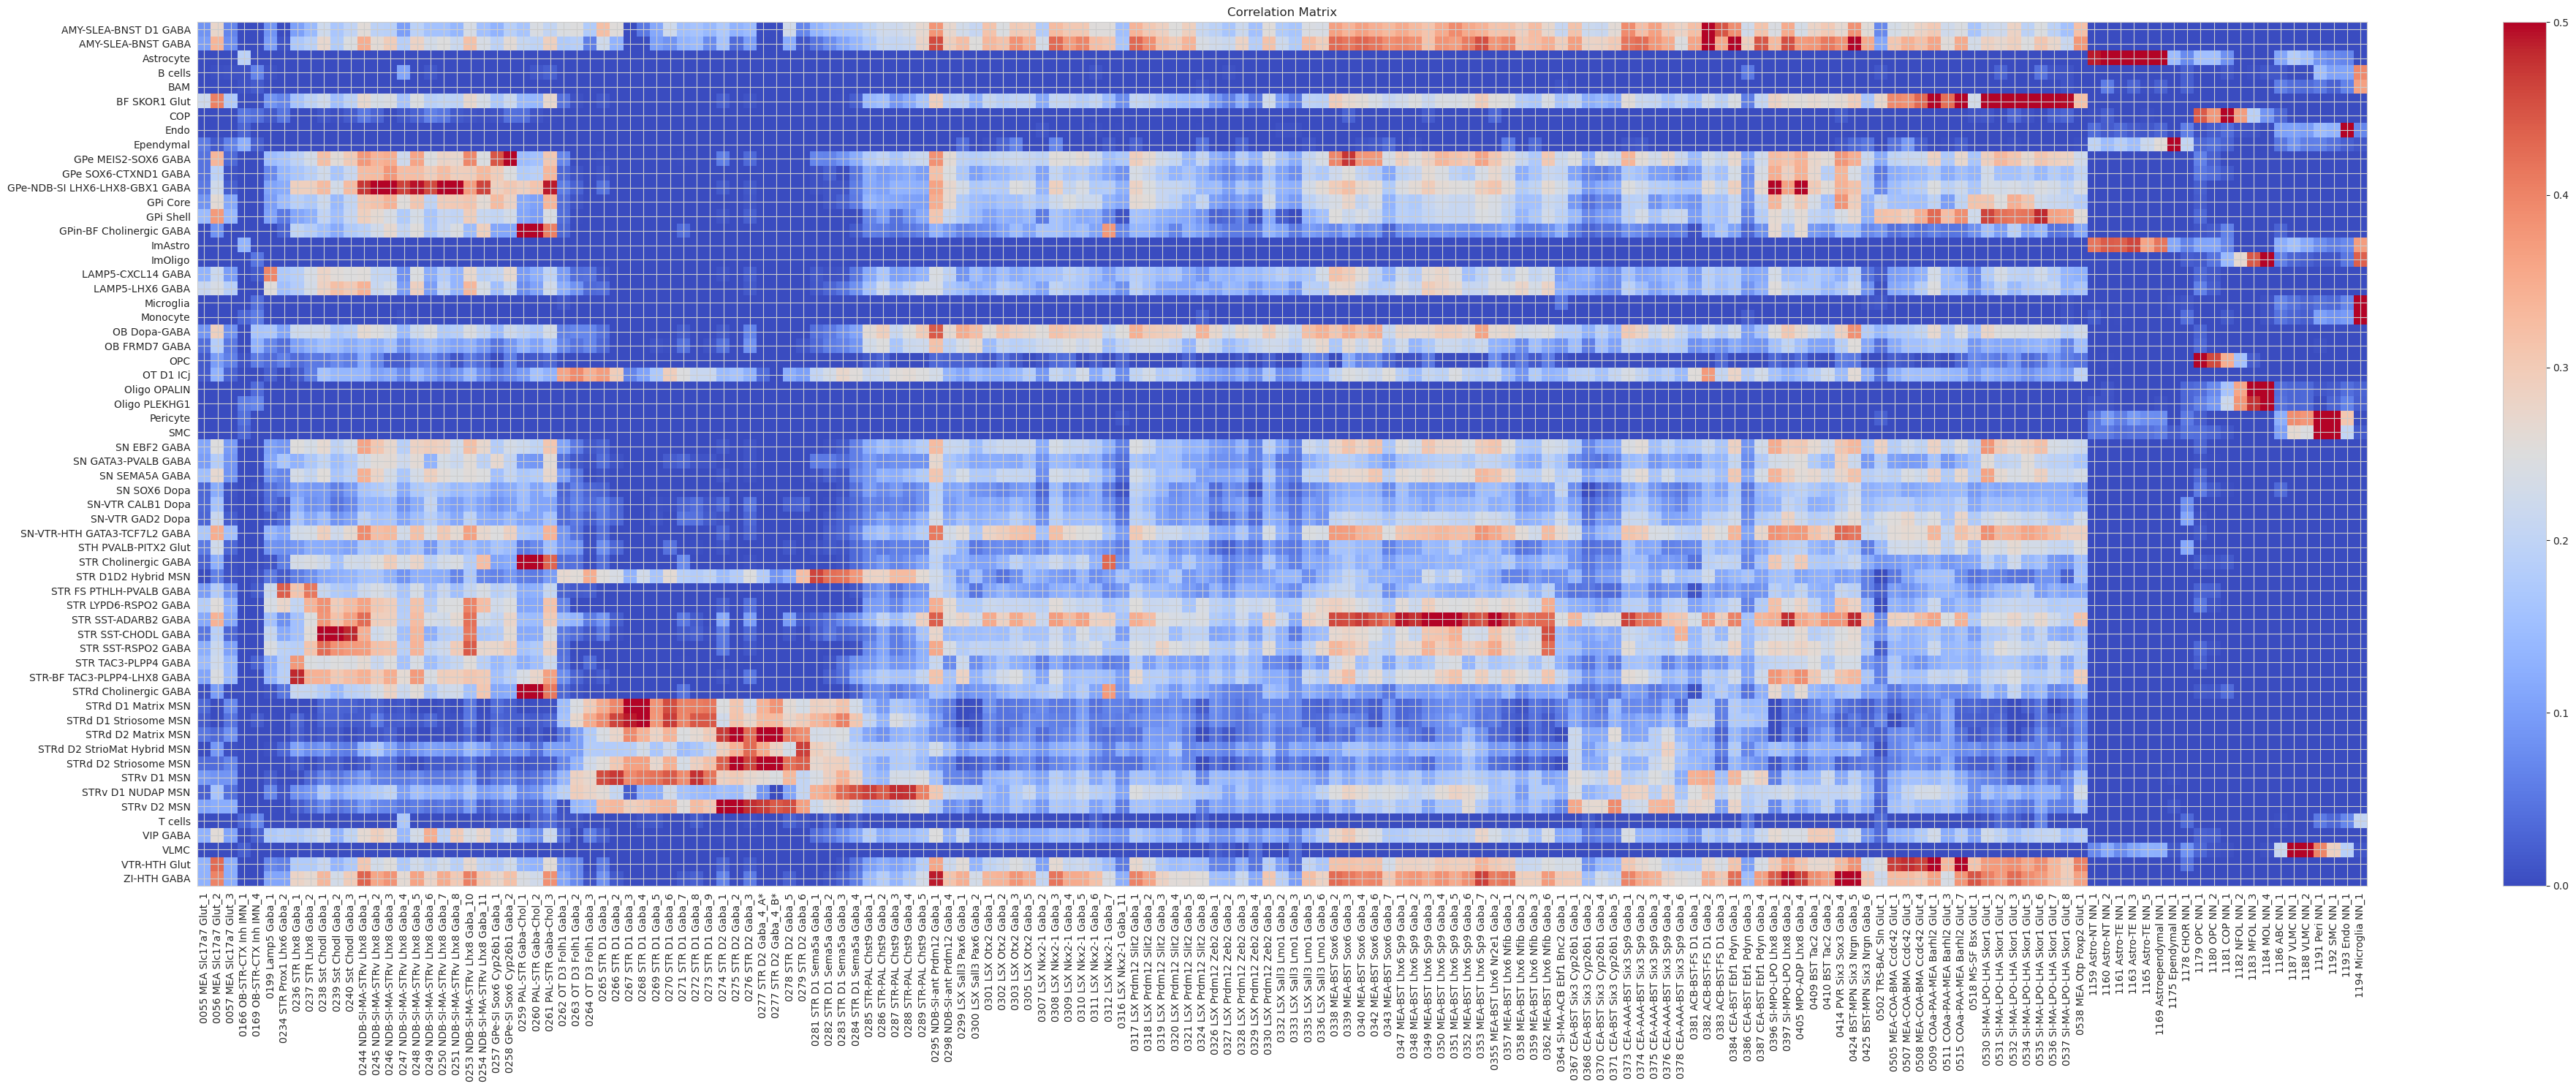

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(40, 15)

# plt.figure(figsize=(40, 15), dpi=150)
im = ax.imshow(corr_mat, cmap='coolwarm', aspect='auto', vmin=0, vmax=0.5)
plt.colorbar(im)

ax.set_xticks(range(corr_mat.shape[1]))
ax.set_xticklabels(wmb_stype_expr.index, rotation=90)

ax.set_yticks(range(corr_mat.shape[0]))
ax.set_yticklabels(hmba_group_expr.index)

# plt.xticks(ticks=np.arange(corr_mat.shape[1]), labels=wmb_stype_expr.index, rotation=90, fontsize=8)
# plt.yticks(ticks=np.arange(corr_mat.shape[0]), labels=hmba_group_expr.index, fontsize=8)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [49]:
# reorder the columns, to make a diagnal sorting
max_rows = np.argmax(corr_mat, axis=0)
col_orders = np.argsort(max_rows)
col_orders

array([114, 113,  61,  73,  80,  83, 103, 110, 122, 124, 117, 116, 115,
       125, 108, 112,  72,  66,  70,  71,  65,  64,  78,  74,  67, 104,
       105,   3, 144, 145, 142, 143, 146, 147, 130, 134, 135, 140, 138,
       139,   0, 131, 136, 137, 152, 161, 149, 148,  22,  86,  23,  26,
       118,  21,  18, 120,  17,  16,  15,  19,  14,  12,  13, 126,  24,
         5,   2, 162,  77,  75,  63,   4,  84,  79,  82,  81,  57,  58,
        76,  69, 150, 151,  28,  27, 154, 155, 153, 159, 160,  25,  68,
        47,  46,   8,   6,  95, 107, 100,  97,  99, 109,  98,  59,  94,
        87,  85,  93,  92,  91,  90,  89,  88, 111,   9,  11, 101,  10,
        20,   7,  32,  36,  29,  38,  35,  33,  43,  45,  42,  40,  34,
        30,  31,  37,  48,  50,  54,  51,  52,  53,  49,  39,  44, 106,
        41, 158, 156, 157,   1, 141, 129, 132, 128, 127,  55, 119,  96,
       102,  56,  60,  62, 121, 123, 133])

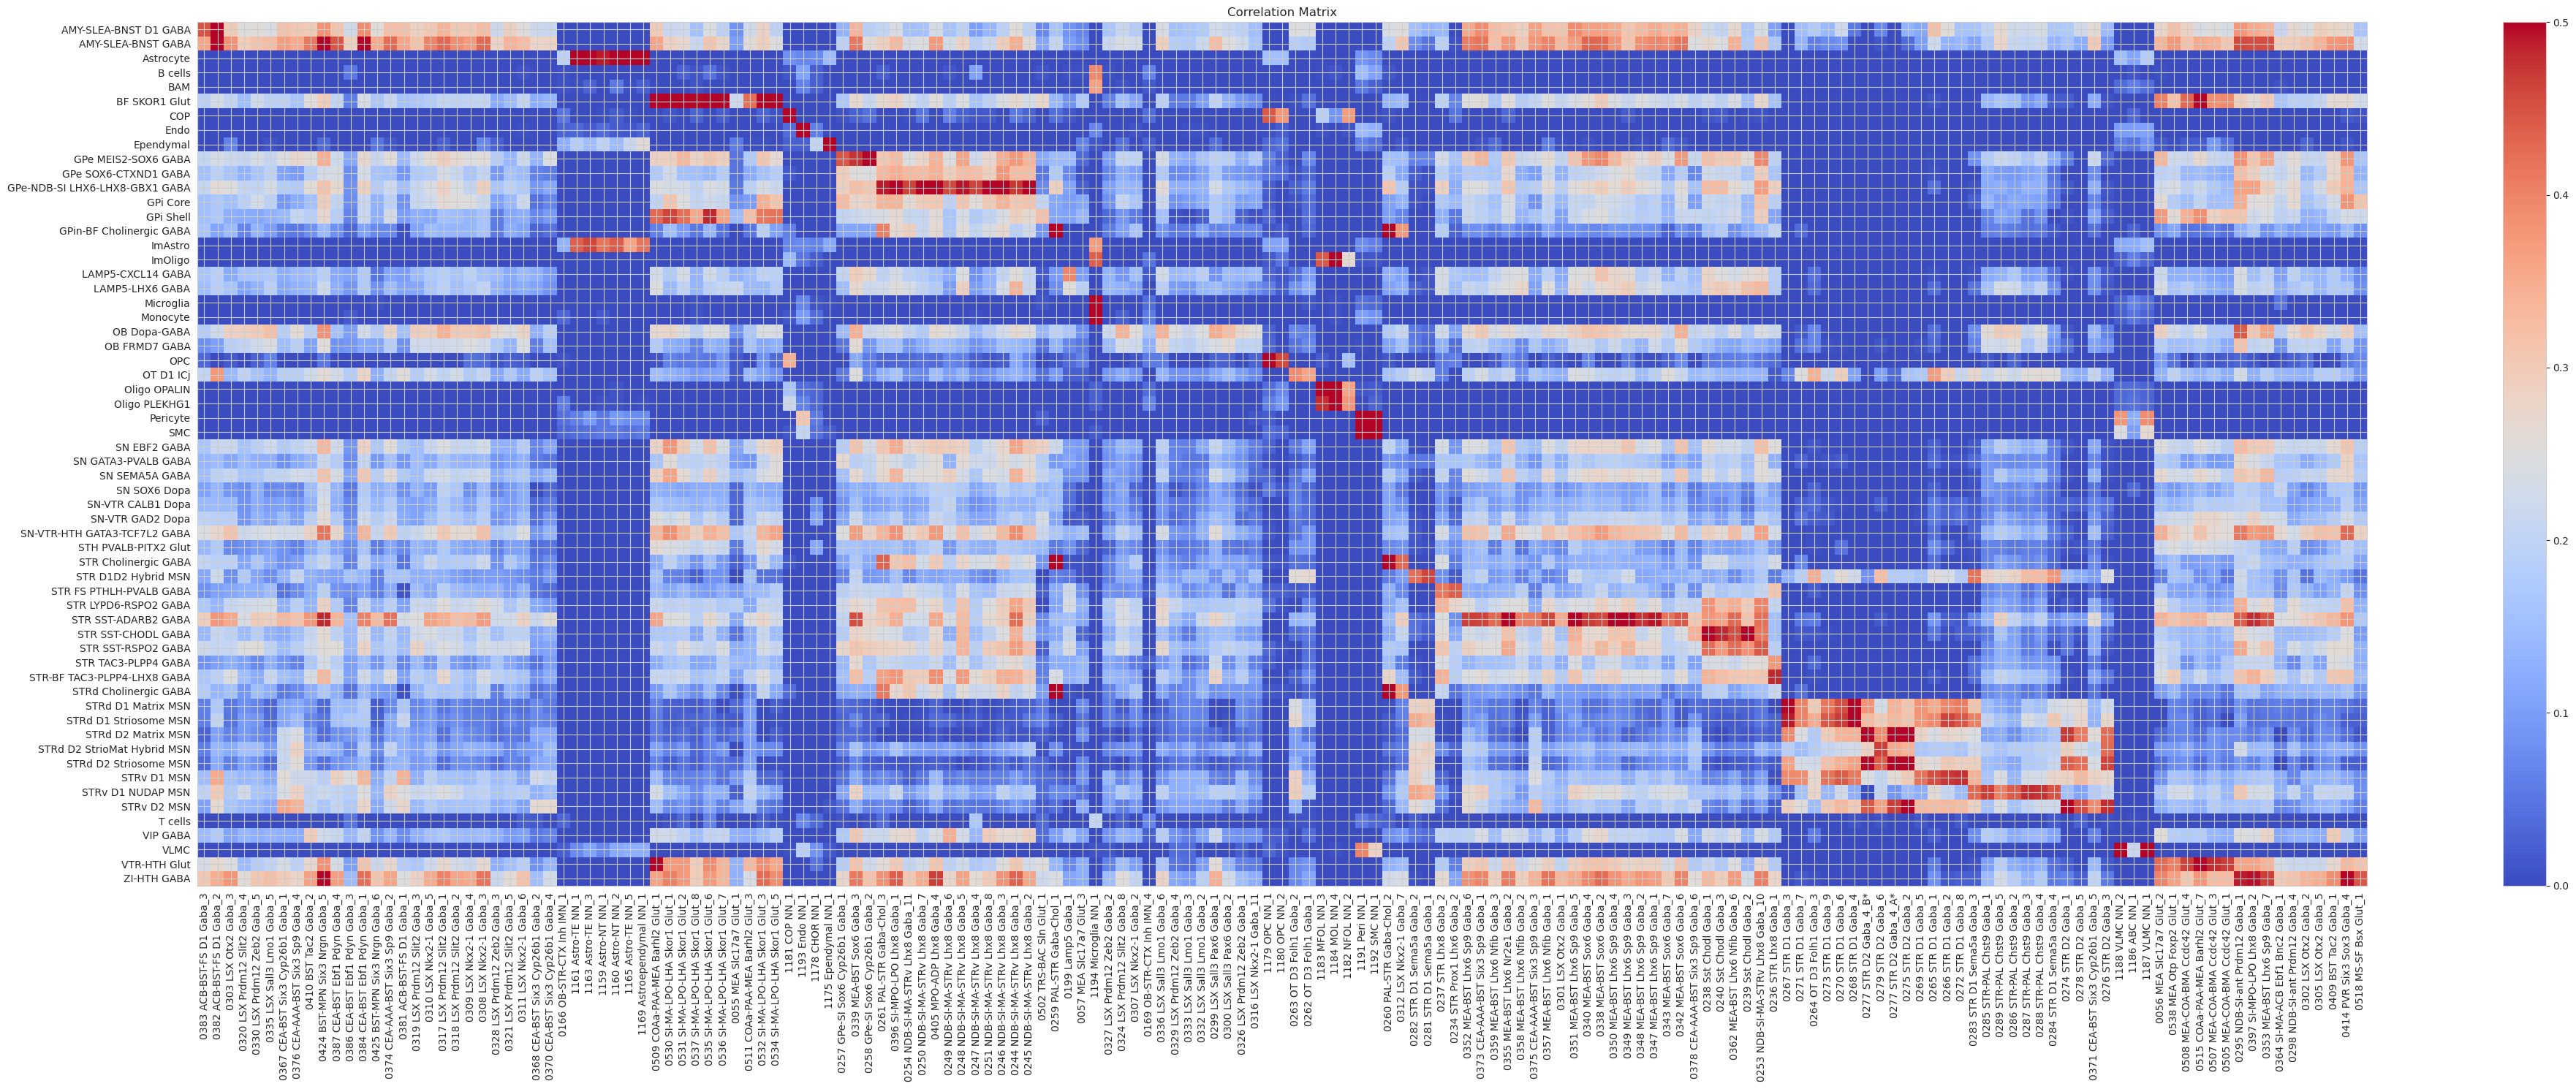

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(40, 15)

# plt.figure(figsize=(40, 15), dpi=150)
im = ax.imshow(corr_mat[:, col_orders], cmap='coolwarm', aspect='auto', vmin=0, vmax=0.5)
plt.colorbar(im)

ax.set_xticks(range(corr_mat.shape[1]))
ax.set_xticklabels(wmb_stype_expr.index[col_orders], rotation=90)

ax.set_yticks(range(corr_mat.shape[0]))
ax.set_yticklabels(hmba_group_expr.index)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [51]:
# reorder the rows, to make a diagnal sorting
max_cols = np.argmax(corr_mat, axis=1)
row_orders = np.argsort(max_cols)
row_orders

array([17, 39, 45, 44, 42, 18, 10, 11, 56, 40, 43,  9, 46, 14, 37, 24, 47,
       48, 52, 54, 51, 49, 50, 38, 53, 22, 21, 41,  0,  1, 34, 30, 35, 12,
       33, 59, 32, 36,  5, 58, 31, 29, 13,  2, 15,  8, 23,  6, 25, 16, 26,
       57, 27, 28,  7,  3, 19, 20,  4, 55])

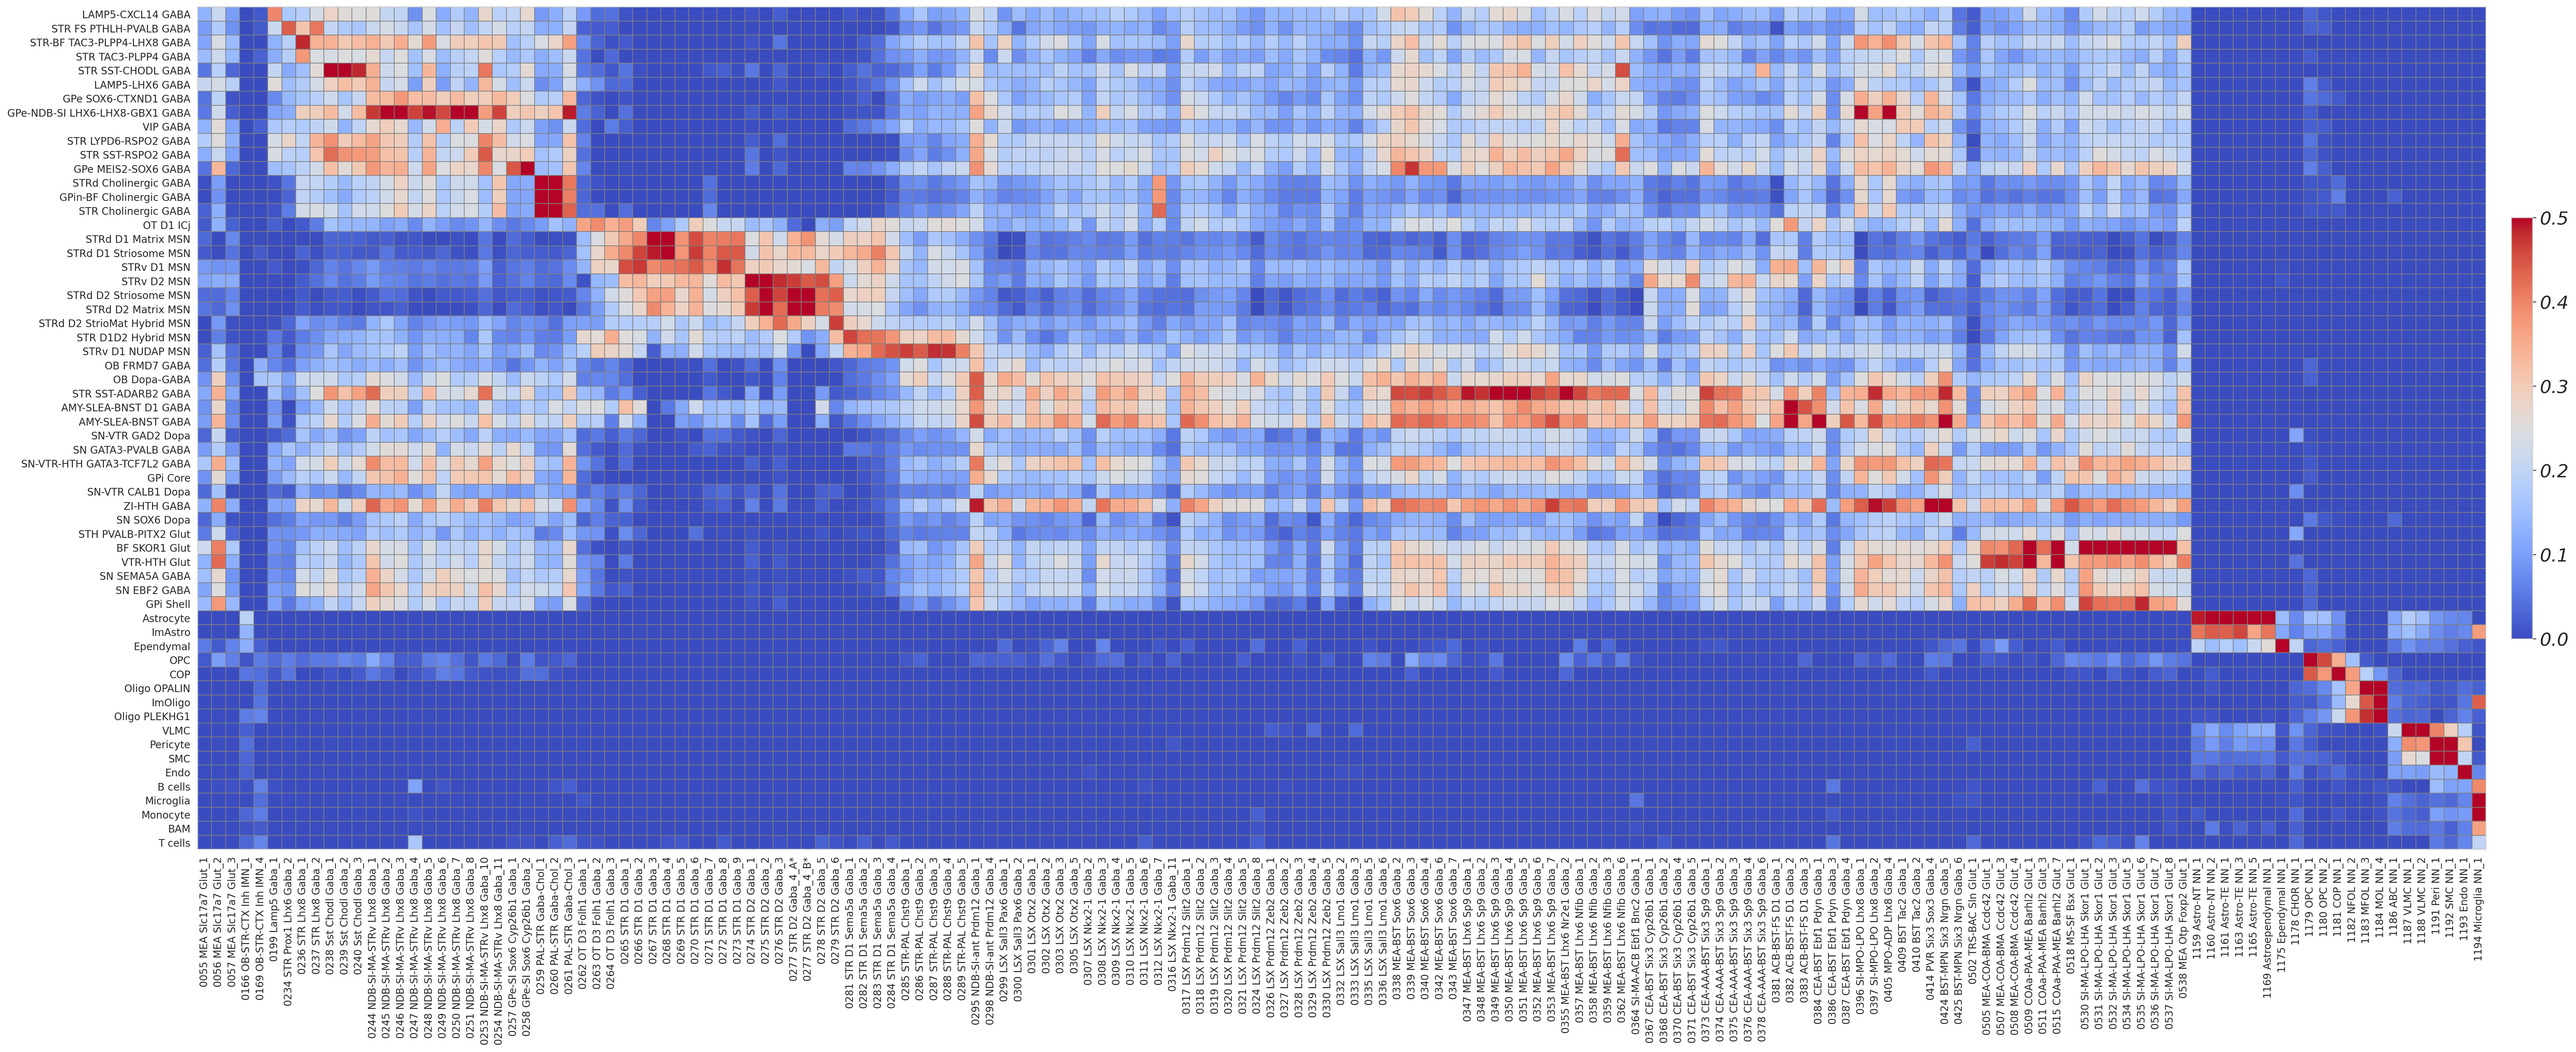

In [52]:
fig, ax = plt.subplots(figsize=(45,15), dpi=200)

# plot
im = ax.imshow(corr_mat[row_orders, :], cmap='coolwarm', vmin=0, vmax=0.5)

# colorbar
cbar = plt.colorbar(im, fraction=0.05, shrink=0.5, pad=0.01)

# import matplotlib.font_manager as fm
helv = fm.FontProperties(family='sans-serif', style='oblique', size=18, weight=500)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontproperties(helv)

# ticks and tick labels
ax.set_xticks(range(corr_mat.shape[1]))
ax.set_xticklabels(wmb_stype_expr.index, rotation=90)

ax.set_yticks(range(corr_mat.shape[0]))
ax.set_yticklabels(hmba_group_expr.index[row_orders])

# cancel ticklines
ax.tick_params(axis='both', grid_alpha=0)

# column border lines
num_cols = corr_mat.shape[1]
col_edges = np.arange(-0.5, num_cols, 1)
for x in col_edges:
    # antializased: remove surrounding extra white areas
    ax.axvline(x, color="gray", linewidth=0.1, antialiased=False)

# row border lines
num_rows = corr_mat.shape[0]
row_edges = np.arange(-0.5, num_rows, 1)
for y in row_edges:
    # antializased: remove surrounding extra white areas
    ax.axhline(y, color="gray", linewidth=0.1, antialiased=False)

plt.show()

In [53]:
# save results
save_dict = {
    'corr_mat': corr_mat,
    'wmb_stype_expr': wmb_stype_expr,
    'hmba_group_expr': hmba_group_expr,
    'hmba_cluster_markers': cluster_df,
    'hs_mm_homologs': merge_hom_df,
    'marker_wmb_bg_adata': marker_wmb_bg_adata,
    'marker_hmba_bg_adata': marker_hmba_bg_adata
}

# save
save_path = '/mnt/Y/Lab/Stereo_seq_data/RL_BG_data/analysis_results/cell_type_mapping_binary_genes_20251005.pkl'
with open(save_path, 'wb') as f:
    pickle.dump(save_dict, f)